In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Big Mart Sales\\New_dataset.csv")
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_1,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_type_new_1,Item_type_new_2
0,9.30,0.126678,15.805354,18,61.115775,0,1,0,0,0,1,0,0,1,0
1,5.92,0.138846,6.947604,8,21.057607,1,1,0,0,1,0,1,0,0,0
2,17.50,0.129461,11.900336,18,45.795961,0,1,0,0,0,1,0,0,1,0
3,19.20,0.000000,13.494258,19,27.062520,1,1,0,0,1,0,0,0,1,0
4,8.93,0.000000,7.339033,30,31.538947,0,0,0,0,1,1,0,0,0,1


In [3]:
X = data.drop(['Item_Outlet_Sales'], axis=1)
y = data.Item_Outlet_Sales

In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y, random_state=0, test_size=0.3)

### Trial 1

In [5]:
# default model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
xgb = GradientBoostingRegressor()
xgb.fit(xtrain,ytrain)
xgb_pred = xgb.predict(xtest)
print(xgb.score(xtrain,ytrain))
print(xgb.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,xgb_pred)))

0.703370678515
0.664826086933
10.827607434


In [6]:
xgb.feature_importances_

array([ 0.10891041,  0.10527681,  0.3614201 ,  0.17850843,  0.00447689,
        0.00458168,  0.01390205,  0.01481873,  0.00880659,  0.06416145,
        0.01443297,  0.11021544,  0.00916663,  0.00132183])

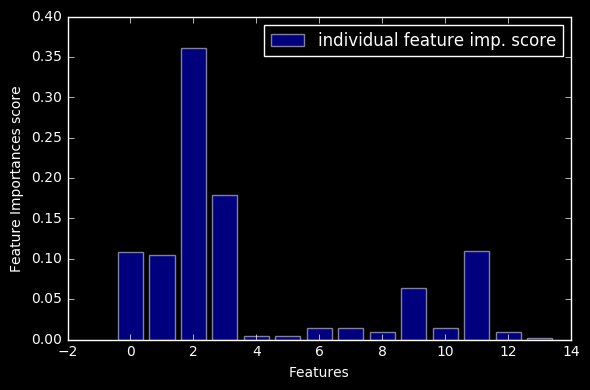

In [7]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(14), xgb.feature_importances_, alpha=0.5, align='center',
            label='individual feature imp. score')
    plt.ylabel('Feature Importances score')
    plt.xlabel('Features')
    plt.legend(loc='best')
    plt.tight_layout()

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_test1 = {'n_estimators':range(20,210,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(xtrain,ytrain)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.59125, std: 0.01199, params: {'n_estimators': 20},
  mean: 0.63948, std: 0.01151, params: {'n_estimators': 30},
  mean: 0.65838, std: 0.01271, params: {'n_estimators': 40},
  mean: 0.66486, std: 0.01219, params: {'n_estimators': 50},
  mean: 0.66782, std: 0.01251, params: {'n_estimators': 60},
  mean: 0.66881, std: 0.01300, params: {'n_estimators': 70},
  mean: 0.66921, std: 0.01345, params: {'n_estimators': 80},
  mean: 0.66929, std: 0.01352, params: {'n_estimators': 90},
  mean: 0.66895, std: 0.01345, params: {'n_estimators': 100},
  mean: 0.66857, std: 0.01344, params: {'n_estimators': 110},
  mean: 0.66844, std: 0.01338, params: {'n_estimators': 120},
  mean: 0.66808, std: 0.01363, params: {'n_estimators': 130},
  mean: 0.66810, std: 0.01392, params: {'n_estimators': 140},
  mean: 0.66779, std: 0.01368, params: {'n_estimators': 150},
  mean: 0.66750, std: 0.01378, params: {'n_estimators': 160},
  mean: 0.66707, std: 0.01368, params: {'n_estimators': 170},
  mean: 0.66688,

In [9]:
gsearch1_pred = gsearch1.predict(xtest)
print(gsearch1.score(xtrain,ytrain))
print(gsearch1.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,gsearch1_pred)))

0.708126461203
0.663466948477
10.8495383311


In [10]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,100)}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(xtrain,ytrain)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.66895, std: 0.01302, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.66890, std: 0.01437, params: {'max_depth': 5, 'min_samples_split': 300},
  mean: 0.66676, std: 0.01537, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.66370, std: 0.01292, params: {'max_depth': 5, 'min_samples_split': 500},
  mean: 0.66463, std: 0.01368, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.66232, std: 0.01458, params: {'max_depth': 5, 'min_samples_split': 700},
  mean: 0.65907, std: 0.01381, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.65577, std: 0.01602, params: {'max_depth': 5, 'min_samples_split': 900},
  mean: 0.65322, std: 0.01426, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.66772, std: 0.01214, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.66882, std: 0.01287, params: {'max_depth': 7, 'min_samples_split': 300},
  mean: 0.66805, std: 0.01332, params: {'max_depth': 7, 'min_samples_split': 400},
  m

In [11]:
gsearch2_pred = gsearch2.predict(xtest)
print(gsearch2.score(xtrain,ytrain))
print(gsearch2.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,gsearch2_pred)))

0.711159797093
0.663236991871
10.8532445004


In [12]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(xtrain,ytrain)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.65411, std: 0.01198, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.64874, std: 0.01430, params: {'min_samples_split': 1200, 'min_samples_leaf': 30},
  mean: 0.63791, std: 0.01146, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.63033, std: 0.01395, params: {'min_samples_split': 1600, 'min_samples_leaf': 30},
  mean: 0.60930, std: 0.01344, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.60192, std: 0.00577, params: {'min_samples_leaf': 30, 'min_samples_split': 2000},
  mean: 0.65495, std: 0.01230, params: {'min_samples_split': 1000, 'min_samples_leaf': 40},
  mean: 0.64905, std: 0.01419, params: {'min_samples_split': 1200, 'min_samples_leaf': 40},
  mean: 0.63818, std: 0.00992, params: {'min_samples_leaf': 40, 'min_samples_split': 1400},
  mean: 0.62974, std: 0.01351, params: {'min_samples_leaf': 40, 'min_samples_split': 1600},
  mean: 0.61069, std: 0.01252, params: {'min_samples_split': 1800, 'min_samples_

In [13]:
gsearch3_pred = gsearch3.predict(xtest)
print(gsearch3.score(xtrain,ytrain))
print(gsearch3.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,gsearch3_pred)))

0.675974109724
0.649985700389
11.0647164898


In [14]:
param_test4 = {'max_features':range(1,10,1)}
gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=60,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10),param_grid = param_test4,n_jobs=4,iid=False, cv=5)
gsearch4.fit(xtrain,ytrain)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54596, std: 0.01185, params: {'max_features': 1},
  mean: 0.61671, std: 0.01113, params: {'max_features': 2},
  mean: 0.64738, std: 0.01680, params: {'max_features': 3},
  mean: 0.65461, std: 0.01512, params: {'max_features': 4},
  mean: 0.66352, std: 0.01677, params: {'max_features': 5},
  mean: 0.66888, std: 0.01618, params: {'max_features': 6},
  mean: 0.67015, std: 0.01534, params: {'max_features': 7},
  mean: 0.67138, std: 0.01762, params: {'max_features': 8},
  mean: 0.67059, std: 0.01625, params: {'max_features': 9}],
 {'max_features': 8},
 0.67137661520772696)

In [15]:
gsearch4_pred = gsearch4.predict(xtest)
print(gsearch4.score(xtrain,ytrain))
print(gsearch4.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,gsearch4_pred)))

0.688694553779
0.665684728412
10.8137295719


In [16]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=60,max_depth=9,min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=7),param_grid = param_test5,n_jobs=4,iid=False, cv=5)
gsearch5.fit(xtrain,ytrain)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.66041, std: 0.01713, params: {'subsample': 0.6},
  mean: 0.66511, std: 0.01552, params: {'subsample': 0.7},
  mean: 0.67036, std: 0.01678, params: {'subsample': 0.75},
  mean: 0.67015, std: 0.01534, params: {'subsample': 0.8},
  mean: 0.67157, std: 0.01500, params: {'subsample': 0.85},
  mean: 0.66981, std: 0.01766, params: {'subsample': 0.9}],
 {'subsample': 0.85},
 0.67156709433703832)

In [17]:
gsearch5_pred = gsearch5.predict(xtest)
print(gsearch5.score(xtrain,ytrain))
print(gsearch5.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,gsearch5_pred)))

0.688999695458
0.664467980352
10.8333901071


In [18]:
gbm_tuned_1 = GradientBoostingRegressor(learning_rate=0.05, n_estimators=600,max_depth=5, min_samples_split=1200,min_samples_leaf=40, subsample=0.75, random_state=10, max_features=7)
gbm_tuned_1.fit(xtrain,ytrain)
gbm_tuned_pred = gbm_tuned_1.predict(xtest)

In [19]:
print(gbm_tuned_1.score(xtrain,ytrain))
print(gbm_tuned_1.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,gbm_tuned_pred)))

0.717250030106
0.661391850924
10.8829366128


In [24]:
gbm_tuned_2 = GradientBoostingRegressor(learning_rate=0.01, n_estimators=600,max_depth=9, min_samples_split=1000,min_samples_leaf=40, subsample=0.75, random_state=10, max_features=8)
gbm_tuned_2.fit(xtrain,ytrain)
gbm_tuned_pred2 = gbm_tuned_2.predict(xtest)
print(gbm_tuned_2.score(xtrain,ytrain))
print(gbm_tuned_2.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,gbm_tuned_pred2)))

0.693418931545
0.666326872996
10.8033392066


In [29]:
gbm_tuned_3 = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1200,max_depth=9, min_samples_split=1000,min_samples_leaf=40, subsample=0.75, random_state=10, max_features=8)
gbm_tuned_3.fit(xtrain,ytrain)
gbm_tuned_pred3 = gbm_tuned_3.predict(xtest)
print(gbm_tuned_3.score(xtrain,ytrain))
print(gbm_tuned_3.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,gbm_tuned_pred3)))

0.710328474196
0.665270391595
10.8204285463


In [26]:
gbm_tuned_4 = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1500,max_depth=9, min_samples_split=1200,min_samples_leaf=40, subsample=0.75, random_state=10, max_features=7)
gbm_tuned_4.fit(xtrain,ytrain)
gbm_tuned_pred4 = gbm_tuned_4.predict(xtest)
print(gbm_tuned_4.score(xtrain,ytrain))
print(gbm_tuned_4.score(xtest,ytest))
print(np.sqrt(mean_squared_error(ytest,gbm_tuned_pred4)))

0.709311132039
0.66564518715
10.8143690519
